# Problem Statement and Data Description

## Chennai House Price Prediction (Regression)

ChennaiEstate is a real estate firm based in Chennai that is involved in the property business for the past 5 years. Since, they are in the business for so long, they have enough data of all the real estate transactions in the city.

They decided to venture into Analytics and have now started a division called “Chennai Estate Analytics” to give consumers as much information as possible about housings and the real estate market in Chennai. A home is often the largest and most expensive purchase a person makes in his or her lifetime. Ensuring real-estate owners have a trusted way to monitor the asset is incredibly important. Hence, they have hired you as a consultant to help them give insights and develop a model to accurately predict real estate prices.

Based on the train dataset, you will need to develop a model that accurately predicts the real estate price in Chennai.

## Data Description

### House Features

    INT_SQFT – The interior Sq. Ft of the property
    N_BEDROOM – The number of Bed rooms
    N_BATHROOM - The number of bathrooms
    N_ROOM – Total Number of Rooms
    QS_ROOMS – The quality score assigned for rooms based on buyer reviews
    QS_BATHROOM – The quality score assigned for bathroom based on buyer reviews
    QS_BEDROOM – The quality score assigned for bedroom based on buyer reviews
    QS_OVERALL – The Overall quality score assigned for the property
    SALE_COND – The Sale Condition
        Normal: Normal Sale
        Abnorml: Abnormal Sale - trade, foreclosure, short sale
        AdjLand: Adjoining Land Purchase
        Family: Sale between family members
        Partial: Home was not completed when last assessed
    BUILDTYPE – The type of building
        House
        Commercial
        Others

### Surrounding and Locality

    AREA – The property in which the real estate is located
    DIST_MAINROAD – The distance of the property to the main road
    PARK_FACIL – Whether parking facility is available
    UTILITY_AVAIL
        AllPub: All public Utilities (E,G,W,& S)
        NoSewr: Electricity, Gas, and Water (Septic Tank)
        NoSeWa: Electricity and Gas Only
        ELO: Electricity only
    STREET
        Gravel
        Paved
        No Access
    MZZONE
        A: Agriculture
        C: Commercial
        I: Industrial
        RH: Residential High Density
        RL: Residential Low Density
        RM: Residential Medium Density

### House Sale Price

    PRT_ID – The Property Transaction ID assigned by ChennaiEstate
    COMMIS – The Commission paid to the agent
    SALES_PRICE – The total sale price of the property

## Loading the Dataset

In [1]:
import pandas as pd
import  matplotlib.pyplot as mtp
df=pd.read_csv(r"C:\Users\samyak\Desktop\11. Assignment Dataset\chennai_house_price_prediction.csv")

## Dropping the useless columns

In [5]:
df=df.drop("PRT_ID",axis=1)

## Replacing the errors

In [6]:
df["AREA"]=df["AREA"].replace(to_replace=["Chrompt","Chrmpet","Chormpet"],value="Chrompet")
df["AREA"]=df["AREA"].replace(to_replace=["TNagar"],value="T Nagar")
df["AREA"]=df["AREA"].replace(to_replace=["Adyr"],value="Adyar")
df["AREA"]=df["AREA"].replace(to_replace=["KKNagar"],value="KK Nagar")
df["AREA"]=df["AREA"].replace(to_replace=["Ann Nagar"],value="Anna Nagar")
df["AREA"]=df["AREA"].replace(to_replace=["Velchery"],value="Velachery")
df["AREA"]=df["AREA"].replace(to_replace=["Ana Nagar"],value="Anna Nagar")
df["AREA"]=df["AREA"].replace(to_replace=["Karapakam"],value="Karapakkam")

In [7]:
df["AREA"].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [8]:
df["SALE_COND"]=df["SALE_COND"].replace(to_replace=["Adj Land"],value="AdjLand")
df["SALE_COND"]=df["SALE_COND"].replace(to_replace=["Partiall","PartiaLl"],value="Partial")
df["SALE_COND"]=df["SALE_COND"].replace(to_replace=["Ab Normal"],value="AbNormal")
df["BUILDTYPE"]=df["BUILDTYPE"].replace(to_replace=["Other"],value="Others")
df["BUILDTYPE"]=df["BUILDTYPE"].replace(to_replace=["Comercial"],value="Commercial")
df["BUILDTYPE"].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [10]:
df["STREET"]=df["STREET"].replace(to_replace="Pavd",value="Paved")
df["STREET"]=df["STREET"].replace(to_replace="NoAccess",value="No Access")
df["UTILITY_AVAIL"]=df["UTILITY_AVAIL"].replace(to_replace="All Pub",value="AllPub")

## Filling the missing values

In [11]:
df.isnull().sum()

AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

### N_BEDROOM

In [12]:
df["N_BEDROOM"].fillna(df["N_BEDROOM"].mode()[0],inplace=True)

### N_BATHROOM

In [13]:
pd.crosstab(df["N_BEDROOM"],df["N_BATHROOM"])

N_BATHROOM,1.0,2.0
N_BEDROOM,,
1.0,3792,0
2.0,1797,554
3.0,0,707
4.0,0,254


In [14]:
for i in range(len(df["N_BATHROOM"])):
    if pd.isnull(df["N_BATHROOM"][i])==True:
        if df["N_BEDROOM"][i]==1.0:
            df["N_BATHROOM"][i]=1.0
        else:
            df["N_BATHROOM"][i]=2.0

<ipython-input-14-69c00184cd11>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["N_BATHROOM"][i]=1.0
<ipython-input-14-69c00184cd11>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["N_BATHROOM"][i]=2.0


### QS_OVERALL

In [15]:
df["QS_OVERALL"]=df.apply(lambda i:(i.QS_ROOMS+i.QS_BEDROOM+i.QS_BATHROOM)/3,axis=1)

In [16]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.266667,144400,7600000
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.866667,304049,21717770
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.366667,92114,13159200
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.066667,77042,9630290
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.200000,74063,7406250


## UNIVARIATE ANALYSIS

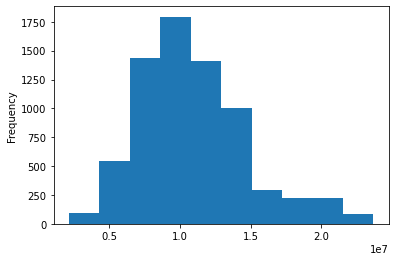

In [17]:
df["SALES_PRICE"].plot.hist()

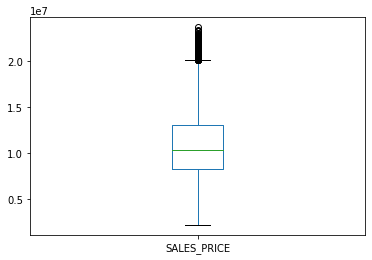

In [18]:
df["SALES_PRICE"].plot.box()

## BIVARIATE ANALYSIS

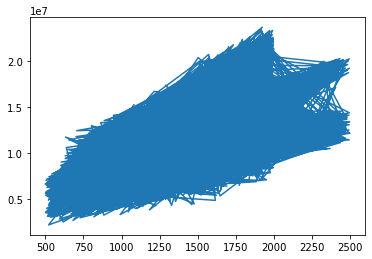

In [21]:
mtp.plot(df["INT_SQFT"],df["SALES_PRICE"])

A positive linear relationship can be seen between the area and sales price

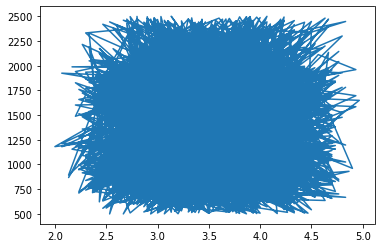

In [22]:
mtp.plot(df["QS_OVERALL"],df["INT_SQFT"])

There is no particular relationship between them

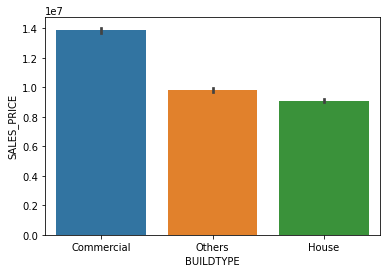

In [30]:
import seaborn as sb
sb.barplot(x="BUILDTYPE",y="SALES_PRICE",data=df)

Commercial Properties tend to have higher sales price

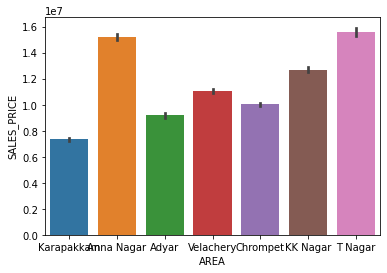

In [31]:
sb.barplot(x="AREA",y="SALES_PRICE",data=df)

Anna Nagar and T Nagar properties tend to have higher sales price

## LINEAR REGRESSION MODEL

In [39]:
df=pd.get_dummies(df)
from sklearn.linear_model import LinearRegression

In [40]:
x=df.drop("SALES_PRICE",axis=1)
y=df["SALES_PRICE"]

### Train Test Split

In [41]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,random_state=20)

In [42]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5331, 41), (1778, 41), (5331,), (1778,))

In [44]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

### Model Evaluation

In [52]:
from sklearn.metrics import mean_squared_log_error as mse

In [56]:
pred_train=lr.predict(x_train)
train_score=mse(y_train,pred_train)

In [57]:
pred_test=lr.predict(x_test)
test_score=mse(y_test,pred_test)

In [58]:
print("Training Score-",train_score)
print("Testing Score-",test_score)

Training Score- 0.00788085815284103
Testing Score- 0.00890537119563493
